# Blast That Sequence!

Ceci est mon implémentation de l'algorithme BLAST

## Installation

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from BlastThat import Blaster

# Test de base

Essayons d'abord de trouver une séquence `TTT` dans `AAAAATTTAAAAAA` pour tester que le score fonctionne.

TTT


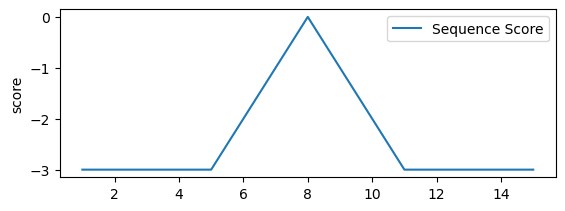

In [2]:
### Devrait imprimer un graphique avec un pique au centre correspondant à l'endr

T_test = "AAAAAGTTTGAAAAA"
S_test = "GTTTG"
score_tester = Blaster(T_test)
score_tester.blast_first_pass(S_test)
score_tester.print_scores()

On veut on veut ensuite tester l'algorithm avec des petites séquences aléatoire. Soit une séquence aléatoire `T` qui inclus `S` en son centre, la première passe devrait posséder plusieurs piques puisqu'on la comparaison est rudimentaire (seulement quelques charactère).

GCG


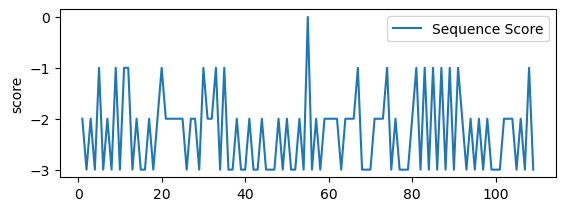

In [3]:
# Alphabet disponible pour créer les séquences
alphabet = ['A', 'C', 'G', 'T']

S_sq = "ATAGCGATC"
# Génération contenant assurément S_sq
T_sq = ""
for i in range(50):
    T_sq += random.choice(alphabet)
T_sq += S_sq
for i in range(50):
    T_sq += random.choice(alphabet)
    
    
blaster_tester = Blaster(T_sq)
blaster_tester.blast_first_pass(S_sq)
blaster_tester.print_scores()

Enfin, essayons maintenant d'étendre la recherche sur les points maximaux trouvé.

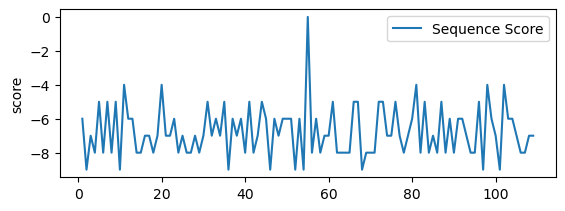

In [5]:

blaster_tester.blast_second_pass(S_sq)
blaster_tester.print_scores()

On voit que les piques sont maintenant réévalué, le plus haut étant le pique au centre, où nous avons délibérément placé la séquence à trouver. 

Essayons alors notre approche sur une plus longue chaine de charactère sans forcément avoir de séquence assuré.

On s'attend à y voir des piques aléatoires, plus petits que le maximum théorique qui égale à `|S_sq|`

TGA


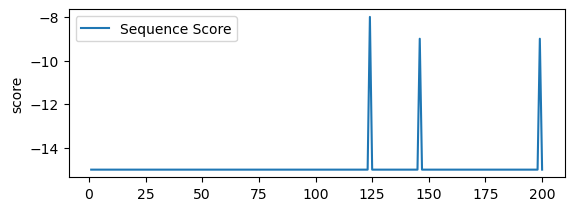

In [6]:
alphabet = ['A', 'C', 'G', 'T']


S_sq = ""
for i in range(15):
    S_sq += random.choice(alphabet)
T_sq = ""
for i in range(200):
    T_sq += random.choice(alphabet)
    
blaster_random = Blaster(T_sq)
blaster_random.blast_first_pass(S_sq)
blaster_random.blast_second_pass(S_sq)
blaster_random.print_scores()

# Trouver la sous-séquence

Maintenant, on peut commencer à construire la matrice de *match* trouvés pour des plus longues sous-séquences.

<Figure size 640x480 with 0 Axes>

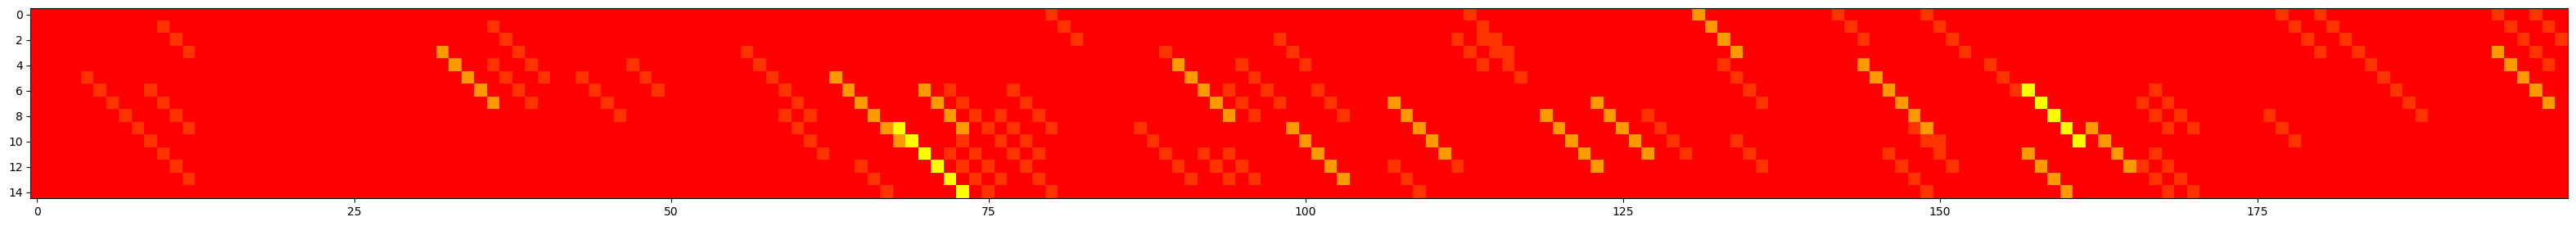

In [14]:
alphabet = ['A', 'C', 'G', 'T']


S_sq = ""
for i in range(15):
    S_sq += random.choice(alphabet)
T_sq = ""
for i in range(200):
    T_sq += random.choice(alphabet)
    
blaster = Blaster(T_sq)
blaster.full_blast(S_sq)
blaster.print_blast_matrix()

On devrait y voir des lignes de points diagonales. Plus les lignes sont marquées et longues, plus les séquences correspondent. On peut maintenant tenter de faire correspondre les segments trouvés à une solution au problème d'alignement.

C'est ici que ma conception diverge quelque peut de l'algorithme BLAST standard. Là où l'algorithme va utiliser une formule comme `Smith-Waterman` pour trouver une solution à partir des sous-séquence, mon implémentation utilise directement le tableau et va naïvement tenter de prolonger les lignes, puis recréer la solution à partir des index directement.

Pour ce faire, je parcours la ligne du centre avec la supposition que la solution optimale utilise *au moins* la moitié du segment `S`. Si une ligne ne se rend pas à l'index mediane, la solution est probablement sous-optimale. Puisque je propage le score sur toute la diagonale à l'étape précédente, il est très rare qu'une solution ait un trou au centre.

<Figure size 640x480 with 0 Axes>

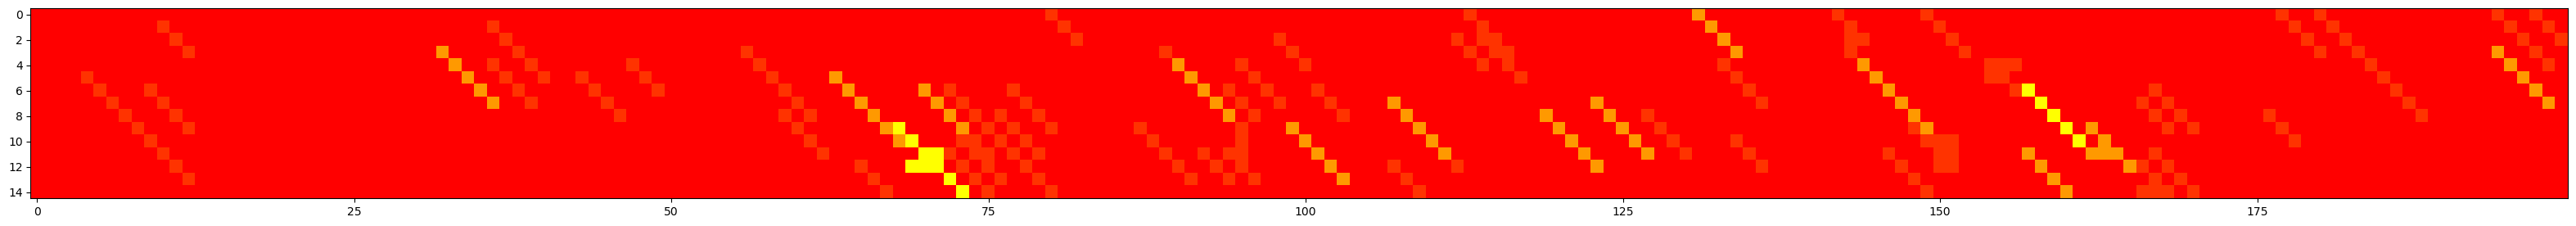

In [15]:
blaster.extend_lines(1, 3)
blaster.print_blast_matrix()

On voit que certaines lignes seront prolongées si et seulement si une ligne peut en être continuée.

Il ne reste plus qu'à retrouver la séquence résulatante à partir des indexes conservé.

In [16]:
blaster.trouver_sequence_allignee(0,3)

T TTTGCTT-CGCCGC
S    GCTTCGC-


Ainsi, on trouve la meilleur sous-séquence d'alignement locale. Cet emplacement devrait être optimal dans la plupart des cas. En contre-partie, on économise énormément de calcul puisqu'on évite de devoir travailler sur tous les éléments d'une séquence. On a une complétion en $O(n \cdot m)$ dans le pire cas si tous les éléments de `S` sont présents parfaitement dans `T`.

Pour ensuite compléter l'alignement de `S`. On peut rouler l'algorithme de `Smith-Waterman` pour prolonger la séquence avec des gap au besoin. Puisque ce dernier est également en $O(n \cdot m)$, le temps complèt pour mon implémentation de BLAST modifiée est de $O(n \cdot m)$ aussi.

# Test sur des plus grandes données

Pour terminer, j'essaie de rouler mon algorithme sur des séquences plus grandes pour tester l'échelle.

In [19]:
alphabet = ['A', 'C', 'G', 'T']

S_sq = ""
for i in range(60):
    S_sq += random.choice(alphabet)
T_sq = ""
for i in range(2000000):
    T_sq += random.choice(alphabet)
big_blaster = Blaster(T_sq)
big_blaster.full_blast(S_sq)
big_blaster.extend_lines(1, 3)
big_blaster.trouver_sequence_allignee(0,3)

KeyboardInterrupt: 

Puis avec un alphabet plus complexe:

In [18]:
alphabet = ['A', 'C', 'G', 'T']
alphabet = [ "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]


S_sq = ""
for i in range(60):
    S_sq += random.choice(alphabet)
T_sq = ""
for i in range(2000000):
    T_sq += random.choice(alphabet)
word_blaster = Blaster(T_sq)
word_blaster.full_blast(S_sq)
word_blaster.extend_lines(1, 3)
word_blaster.trouver_sequence_allignee(0,3)

T GTBYABTGGTB
S    YABGG-
